<a href="https://colab.research.google.com/github/BlackUBird/TMCIT_T5DSP/blob/main/T5_DSP_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from IPython.display import Audio


16000


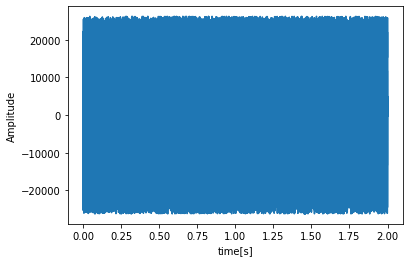

In [5]:
# ホワイトノイズ
# 読み込み
# サンプリング周波数,振幅
fs1,wn = read( "wn_fs16k_2sec.wav" )
# サンプリング周波数を表示
print( fs1 )
# 時間
t1 = np.arange( 0 , len(wn)/fs1 , 1/fs1 )
# グラフを表示
plt.plot( t1 , wn )
plt.xlabel( "time[s]" )
plt.ylabel( "Amplitude" )
# 音声として出力
Audio( wn , rate=fs1 )


16000


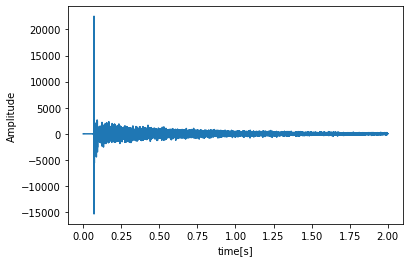

In [6]:
# rir
# 読み込み
# サンプリング周波数,振幅
fs2,rir = read( "rir_fs16k_2sec.wav" )
# サンプリング周波数を表示
print( fs2 )
# 時間
t2 = np.arange( 0 , len(wn)/fs2 , 1/fs2 )
# グラフを表示
plt.plot( t2 , rir )
plt.xlabel( "time[s]" )
plt.ylabel( "Amplitude" )
# 音声として出力
Audio( rir , rate=fs2 )


In [7]:
# 白色雑音とrirを畳み込み
# フーリエ変換用
from numpy.fft import fft,ifft


In [8]:
N = len( wn ) + len( rir )
# 円状畳み込みのためのゼロ埋め
wn_pad = np.hstack( [ wn , np.zeros( N-len(wn)) ] )
rir_pad = np.hstack( [ rir , np.zeros( N-len(rir)) ] )


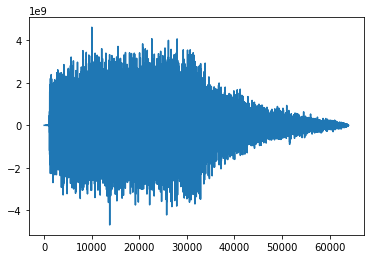

In [9]:
# 円状畳み込み
Y = fft( wn_pad ) * fft( rir_pad )
y = np.real( ifft(Y) )
# 表示
plt.plot( y )
Audio( y , rate=fs1 )


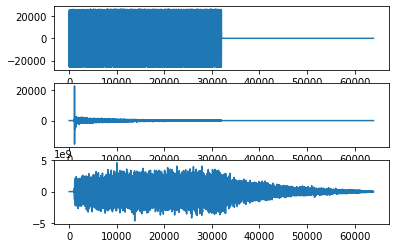

In [18]:
plt.subplot( 3 , 1 , 1 )
plt.plot( wn_pad )
plt.subplot( 3 , 1 , 2 )
plt.plot( rir_pad )
plt.subplot( 3 , 1 , 3 )
plt.plot( y )

---ここまでが準備---

入力信号のスペクトル$X(k)$

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


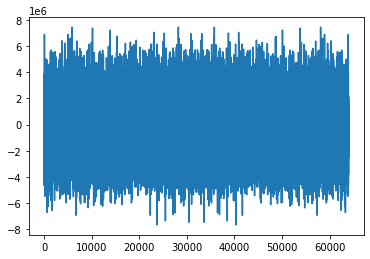

In [15]:
# 入力信号のスペクトル
X = fft( wn_pad )
plt.plot( X )


パワースペクトル$X^{*}X$  
( ${*}$ ・・・複素共役)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


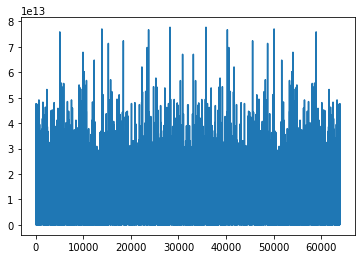

In [16]:
# パワースペクトル
Sxx = np.conjugate( X ) * X
plt.plot( Sxx )


クロススペクトル$X^{*}Y$

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


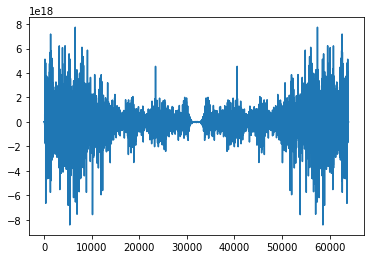

In [14]:
# クロススペクトル
Sxy = np.conjugate( X ) * Y
plt.plot( Sxy )


伝達関数 $H(k) = X^{*}Y / X^{*}X$

In [22]:
# 伝達関数
H = Sxy / Sxx

In [23]:
# 伝達関数の実部
h = np.real( ifft( H ) )


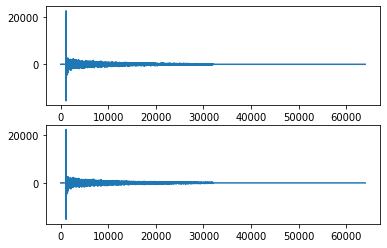

In [24]:
# グラフの表示
plt.subplot( 2 , 1 , 1 )
plt.plot( rir_pad )
plt.subplot( 2 , 1 , 2 )
plt.plot( h )

これらにより、任意の白色雑音をあたかも室内で再生しているかのようにすることができる。  
さらに、それに任意の音声を畳み込むことで、その音声を室内で再生しているかのような音を作ることができる